In [1]:
from natsort import natsorted
from skimage.measure import compare_psnr
import os
import glob
import subprocess
import imageio
import numpy as np
import math
import matplotlib.pyplot as plt

import cv2


In [ ]:
def MSE(gt,pred):
    mse = np.mean((gt-pred)**2)
    return mse

def PSNR(mse,data_range):
    psnr = 10*np.log10((data_range**2)/mse)
    return psnr

In [ ]:
import pathlib
pathlib.Path().absolute()


In [ ]:
images = natsorted(glob.glob("Images/*.png"))

In [ ]:
# ENCODING

qp = '25'
c = 'ycbcr'
f = '444'
m = '5'

command_base = "bpgenc.exe"
os.makedirs("compressed_streams_qp"+qp, exist_ok=True)
d = 0
for im in images:
    o = "compressed_streams_qp"+qp+"/"+str(d)+".bpg"
    command = command_base+" -o "+o+" -q "+qp+" -c"+c+" -f"+f+" -m "+m+" "+im
    
    os.system(command)
    
    d += 1


In [ ]:
# DECODING

command_base = "bpgdec.exe"
os.makedirs("decompressed_qp"+qp, exist_ok=True)
bit_streams = natsorted(glob.glob("compressed_streams_qp"+qp+"/*.bpg"))

d = 0
for stream in bit_streams:
    o = "decompressed_qp"+qp+"/"+str(d)+".png"
    command = command_base+" -o "+o+" "+stream
    
    os.system(command)
    
    d += 1

    


In [ ]:
# BPP vs PSNR

bit_stream = natsorted(glob.glob("compressed_streams_qp"+qp+"/*.bpg"))
real_images = natsorted(glob.glob("Images/*.png"))
pred_images = natsorted(glob.glob("decompressed_qp"+qp+"/*.png"))

total_mse = 0
total_size = 0
total_pixel = 0


for j in range(len(pred_images)):
    size = os.path.getsize(bit_stream[j])*8
    total_size += size
    
    

    real = imageio.imread(real_images[j]).astype(np.float32)
    pred = imageio.imread(pred_images[j]).astype(np.float32)

    
    mse = MSE(real, pred)
    total_mse += mse
    
    total_pixel += np.size(real)

avg_mse = total_mse / len(bit_stream)

psnr = PSNR(avg_mse, 255.0)
bpp = total_size / total_pixel

avg_mse

In [ ]:
bpp

In [ ]:
psnr

In [6]:
psnr_list420 = [35.227795481238687, 31.891044423930836, 28.89077154624394]
bpp_list420 = [0.39482421875, 0.23285546875, 0.12584071180555556]

In [7]:
psnr_list444 = [36.152924594159963, 32.468408705807029, 29.153698895503798]
bpp_list444 = [0.42736284722222223, 0.24778342013888888, 0.13103385416666666]

In [8]:
psnr_listcnn = [31.558169529460372, 31.648169529460372]
bpp_listcnn = [0.27496614583333334, 0.24796614583333334]

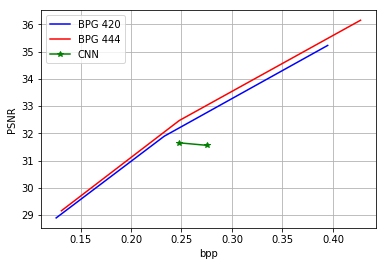

In [9]:
plt.plot(bpp_list420, psnr_list420, color="b", label="BPG 420")
plt.plot(bpp_list444, psnr_list444, color="r", label="BPG 444")
plt.plot(bpp_listcnn, psnr_listcnn, color="g", marker="*", label="CNN")
plt.grid()
plt.xlabel("bpp")
plt.ylabel("PSNR")
plt.legend()
plt.savefig("bpp_psnr.png")